In [333]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [345]:
def data_pre_processing(year):
    # Read in the csvs
    boxScore = pd.read_csv(f"Per_36 Box Score Data/NBA Per_36 Box Score Data {year} - Sheet1.csv")
    shooting = pd.read_csv(f"NBA Shooting Data/NBA Shooting Data {year} - Sheet1.csv")

    # Remove totals for traded players (Dont double count them)
    boxScore = boxScore[(boxScore['Team'] != '2TM') | (boxScore['Team'] != '3TM') | (boxScore['Team'] != '4TM') | (boxScore['Team'] != '5TM')]
    shooting = shooting[(shooting['Team'] != '2TM') | (shooting['Team'] != '3TM') | (shooting['Team'] != '4TM') | (shooting['Team'] != '5TM')]

    # Stats become predictive after 10 - 15 games, so remove small sample sizes
    boxScore = boxScore[boxScore['MP'] > 250]
    shooting = shooting[shooting['MP'] > 250]

    # find percentage of shots that are jumpshots and what the players shoot on those shots
    shooting['percJumpshot'] = shooting['10-16 (% of FGA)'] + shooting['16-3P (% of FGA)'] + shooting['3P (% of FGA)']
    shooting['jumpshotPercentage'] = (shooting['10-16%'] * (shooting['10-16 (% of FGA)'] / shooting['percJumpshot'])) + (shooting['16-3P%'] * (shooting['16-3P (% of FGA)'] / shooting['percJumpshot'])) + (shooting['3P%'] * (shooting['3P (% of FGA)'] / shooting['percJumpshot']))

    # impute missing values
    knn_imputer = KNNImputer()
    shootingImputed = pd.DataFrame(knn_imputer.fit_transform(shooting.iloc[:, -2:]), columns = shooting.columns[-2:])
    
    # merge the 2 columns
    df = pd.merge(boxScore, shooting, on = ['Player', 'Team'], how = 'left')

    # drop unneeded columns
    #df = df.drop(['Rk_x', 'Player', 'Team', 'G_x', 'GS_x', 'MP_x', 'FG', '3P_x', '2P_x', '2PA', '2P%_x', 'eFG%',
                  #'FT', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'Awards_x', 'Player-additional', 'Rk_y', 'Age_y', 'Pos_y',
                  #'G_y', 'GS_y', 'MP_y', 'FG%_y', 'avgDistance', '2P (% of FGA)', '0-3 (% of FGA)', '3-10 (% of FGA)',
                  #'10-16 (% of FGA)', '16-3P (% of FGA)', '3P (% of FGA)', '2P%_y', '0-3%', '3-10%', '10-16%', '3PA', '3P%_x',	
                  #'16-3P%', '3P%_y', '2P_y', '3P_y', '%FGA', '#', '%3PA', '3P%.1', 'Att.', 'Md.', 'Awards_y', '-9999'], axis = 1)

    # get dummies for Position
    #df = pd.get_dummies(df, drop_first = True, dtype = 'int')

    # center and scale predictors
    #posIdx = df.apply(lambda x: np.all(x > 0))
    #posIdx[-4:] = False
    #posIdx = np.array(posIdx)
    
    #df.loc[:, posIdx] = df.iloc[:, posIdx].apply(lambda x: boxcox(x + 0.01)[0])
    #df.iloc[:, :-4] = df.iloc[:, :-4].apply(lambda x: scale(x))
    
    return df

In [347]:
test = data_pre_processing(2024)

In [353]:
test.columns

Index(['Rk_x', 'Player', 'Age_x', 'Team', 'Pos_x', 'G_x', 'GS_x', 'MP_x', 'FG',
       'FGA', 'FG%_x', '3P_x', '3PA', '3P%_x', '2P_x', '2PA', '2P%_x', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Awards_x', 'Player-additional', 'Rk_y', 'Age_y', 'Pos_y',
       'G_y', 'GS_y', 'MP_y', 'FG%_y', 'avgDistance', '2P (% of FGA)',
       '0-3 (% of FGA)', '3-10 (% of FGA)', '10-16 (% of FGA)',
       '16-3P (% of FGA)', '3P (% of FGA)', '2P%_y', '0-3%', '3-10%', '10-16%',
       '16-3P%', '3P%_y', '2P_y', '3P_y', '%FGA', '#', '%3PA', '3P%.1', 'Att.',
       'Md.', 'Awards_y', '-9999', 'percJumpshot', 'jumpshotPercentage'],
      dtype='object')

In [249]:
df2000 = data_pre_processing(2000)
df2001 = data_pre_processing(2001)
df2002 = data_pre_processing(2002)
df2003 = data_pre_processing(2003)
df2004 = data_pre_processing(2004)
df2005 = data_pre_processing(2005)
df2006 = data_pre_processing(2006)
df2007 = data_pre_processing(2007)
df2008 = data_pre_processing(2008)
df2009 = data_pre_processing(2009)
df2010 = data_pre_processing(2010)
df2011 = data_pre_processing(2011)
df2012 = data_pre_processing(2012)
df2013 = data_pre_processing(2013)
df2014 = data_pre_processing(2014)
df2015 = data_pre_processing(2015)
df2016 = data_pre_processing(2016)
df2017 = data_pre_processing(2017)
df2018 = data_pre_processing(2018)
df2019 = data_pre_processing(2019)
df2020 = data_pre_processing(2020)
df2021 = data_pre_processing(2021)
df2022 = data_pre_processing(2022)
df2023 = data_pre_processing(2023)
df2024 = data_pre_processing(2024)

/var/folders/6z/0pv81j2524v8c80qsmnrbmcm0000gn/T/ipykernel_5844/4164128659.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.78104904 2.90689233 2.85943632 2.69201935 2.69201935 2.83433934
 2.80823686 2.62525337 2.75268634 2.95109498 2.69201935 2.72304786
 2.72304786 2.69201935 2.58919571 2.97210448 2.95109498 2.80823686
 2.83433934 3.01215666 2.62525337 2.85943632 2.78104904 2.80823686
 2.85943632 2.88359925 2.6594708  2.78104904 2.69201935 2.78104904
 2.72304786 2.83433934 2.75268634 2.95109498 2.80823686 2.83433934
 2.72304786 2.6594708  2.80823686 2.80823686 2.85943632 2.58919571
 2.85943632 2.72304786 2.97210448 2.85943632 2.83433934 2.78104904
 2.75268634 2.88359925 2.97210448 2.78104904 2.78104904 2.85943632
 2.90689233 2.85943632 2.6594708  2.97210448 2.97210448 2.90689233
 2.92937345 2.62525337 2.72304786 2.72304786 2.88359925 2.90689233
 2.58919571 2.92937345 2.88359925 2.69201935 3.03127501 3.01215

In [251]:
df2024.head()

,Age_x,FGA,FG%_x,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_x_PF,Pos_x_PG,Pos_x_SF,Pos_x_SG
0,1.543790,1.114968,0.328154,2.131494,0.850500,-0.879681,0.881542,-1.216156,1.402113,0.510036,0.937567,0,0,1,0
1,0.243647,0.323303,1.588335,1.279042,-0.729364,1.931768,1.754456,0.305992,0.894529,-1.615524,1.121871,0,0,0,0
2,-0.789662,0.829959,-0.161973,0.373093,0.667771,-0.639020,0.881542,-0.639288,0.775203,0.275903,0.302567,0,1,0,0
3,0.243647,1.114968,-0.342482,0.786174,0.386795,-0.528124,0.337174,-1.900733,1.010664,0.624807,0.400110,0,0,1,0
4,-1.428390,1.519981,-0.036375,2.064419,-0.537292,0.477308,1.019159,-1.063387,1.461681,0.023407,0.160514,1,0,0,0


In [253]:
df2024.columns

Index(['Age_x', 'FGA', 'FG%_x', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'PTS',
       'percJumpshot', 'jumpshotPercentage', 'Pos_x_PF', 'Pos_x_PG',
       'Pos_x_SF', 'Pos_x_SG'],
      dtype='object')

In [255]:
df = pd.concat([df2000, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010,
                df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021,
                df2022, df2023, df2024])

df.head()

,Age_x,FGA,FG%_x,FTA,FT%,TRB,AST,PF,PTS,percJumpshot,jumpshotPercentage,Pos_x_PF,Pos_x_PG,Pos_x_SF,Pos_x_SG
0,-0.343232,1.650825,0.323272,0.008300,0.801017,-0.176918,0.922494,-2.024716,1.416797,0.567279,0.814314,0,0,1,0
1,0.763984,1.795519,0.155231,0.648915,-0.123694,-0.096725,1.775669,-1.859233,1.746514,0.066756,-0.361831,0,1,0,0
2,0.346448,0.851193,-0.088475,0.648915,1.371893,-0.928374,0.529790,-1.703125,0.824125,0.455421,0.609940,0,0,1,0
3,-1.126547,1.621768,1.063744,0.702563,0.183908,1.388098,0.886938,-1.282124,1.703023,0.101112,1.019024,1,0,0,0
4,-1.126547,0.851193,0.472188,1.530101,0.671978,1.045422,0.243128,-0.806919,1.260010,-0.669107,-0.132067,0,0,1,0


In [257]:
df.shape

(11479, 15)

In [259]:
outcome = df.iloc[:, 9:11]
predictors = df.drop(['percJumpshot', 'jumpshotPercentage'], axis = 1)

In [261]:
predictors.head()

,Age_x,FGA,FG%_x,FTA,FT%,TRB,AST,PF,PTS,Pos_x_PF,Pos_x_PG,Pos_x_SF,Pos_x_SG
0,-0.343232,1.650825,0.323272,0.008300,0.801017,-0.176918,0.922494,-2.024716,1.416797,0,0,1,0
1,0.763984,1.795519,0.155231,0.648915,-0.123694,-0.096725,1.775669,-1.859233,1.746514,0,1,0,0
2,0.346448,0.851193,-0.088475,0.648915,1.371893,-0.928374,0.529790,-1.703125,0.824125,0,0,1,0
3,-1.126547,1.621768,1.063744,0.702563,0.183908,1.388098,0.886938,-1.282124,1.703023,1,0,0,0
4,-1.126547,0.851193,0.472188,1.530101,0.671978,1.045422,0.243128,-0.806919,1.260010,0,0,1,0


In [263]:
outcome.head()

,percJumpshot,jumpshotPercentage
0,0.567279,0.814314
1,0.066756,-0.361831
2,0.455421,0.609940
3,0.101112,1.019024
4,-0.669107,-0.132067


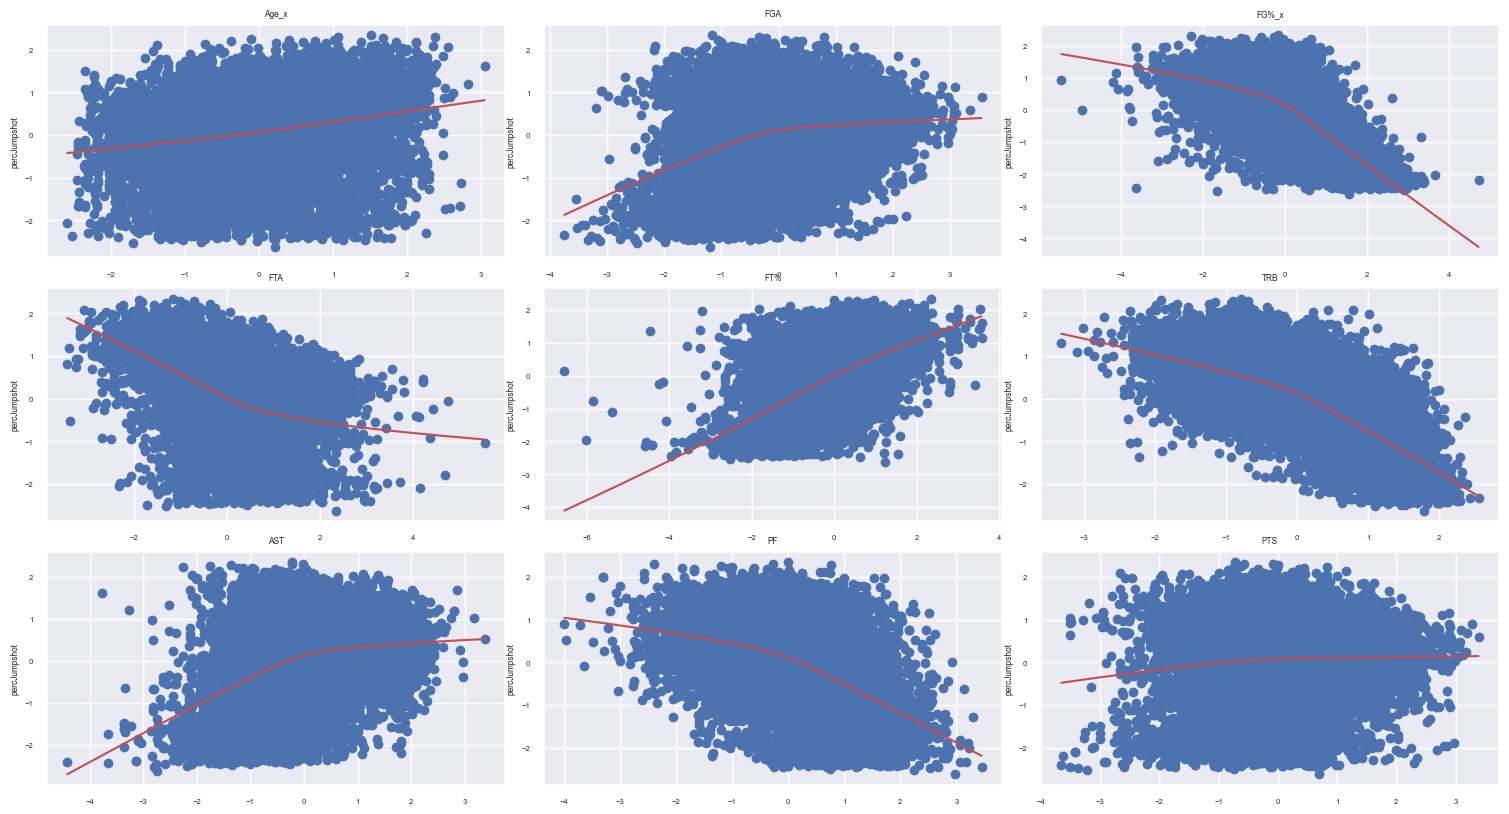

In [267]:
import statsmodels.api as sm

# predictorsContin contains the 12 continuous predictor columns
predictorsContin = predictors[predictors.columns[:-4]]

# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContin.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContin[col]
    z = lowess(np.squeeze(outcome.iloc[:, 0]), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcome.iloc[:, 0])
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcome.columns[0])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

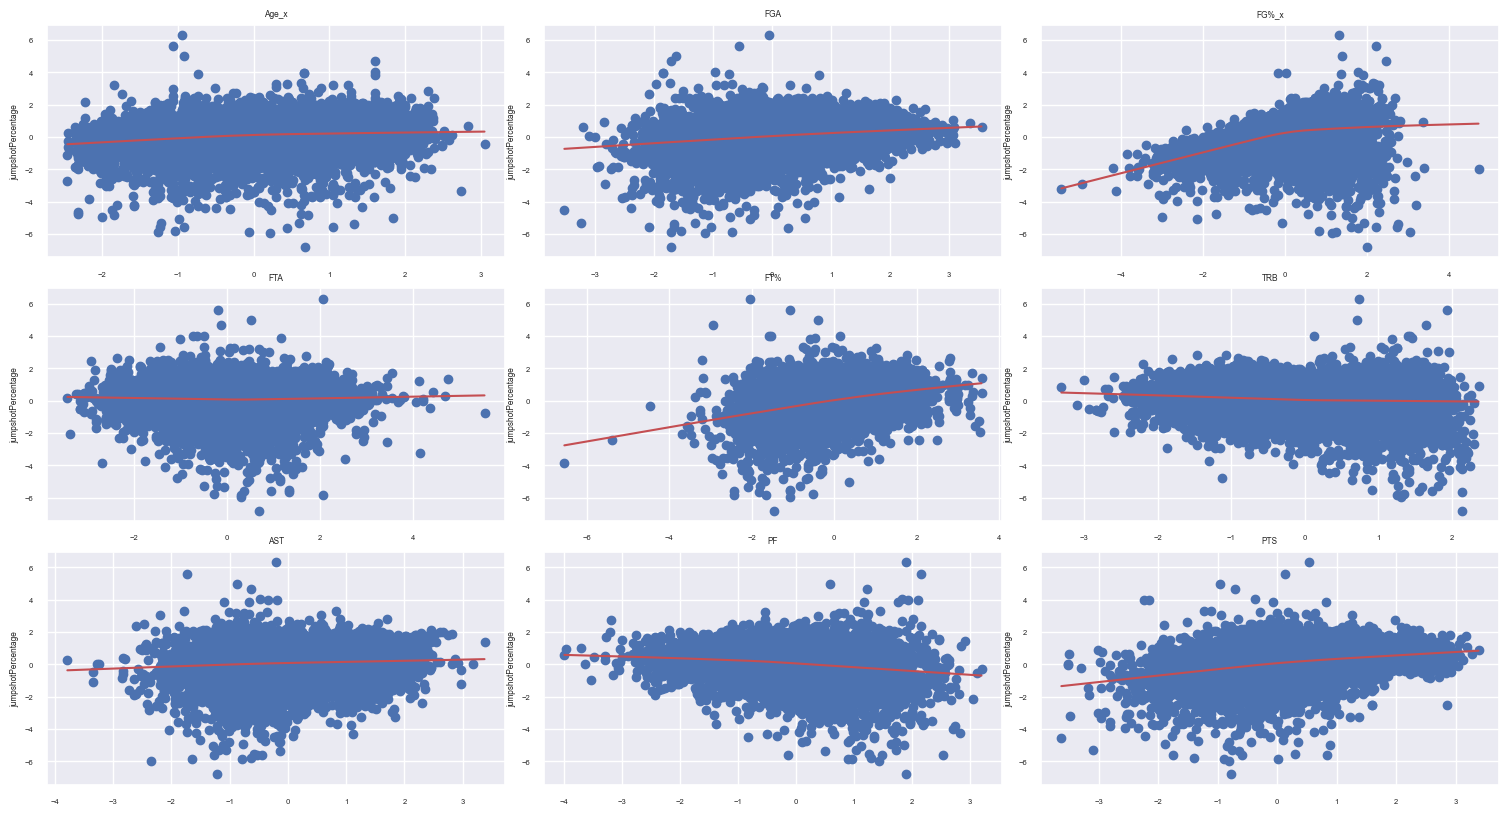

In [269]:
# Run local smoother lowess
lowess = sm.nonparametric.lowess

# Draw scatterplots
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
fig.tight_layout()

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each column and plot
for i, col in enumerate(predictorsContin.columns):
    if i >= nrows * ncols:
        break  # Stop if we exceed the number of subplots

    X_graph = predictorsContin[col]
    z = lowess(np.squeeze(outcome.iloc[:, 1]), np.squeeze(X_graph), frac=0.9)
    
    axs[i].scatter(X_graph, outcome.iloc[:, 1])
    axs[i].plot(z[:, 0], z[:, 1], 'r')
    axs[i].set_title(col)
    axs[i].set_ylabel(outcome.columns[1])

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    axs[j].axis('off')

plt.show()

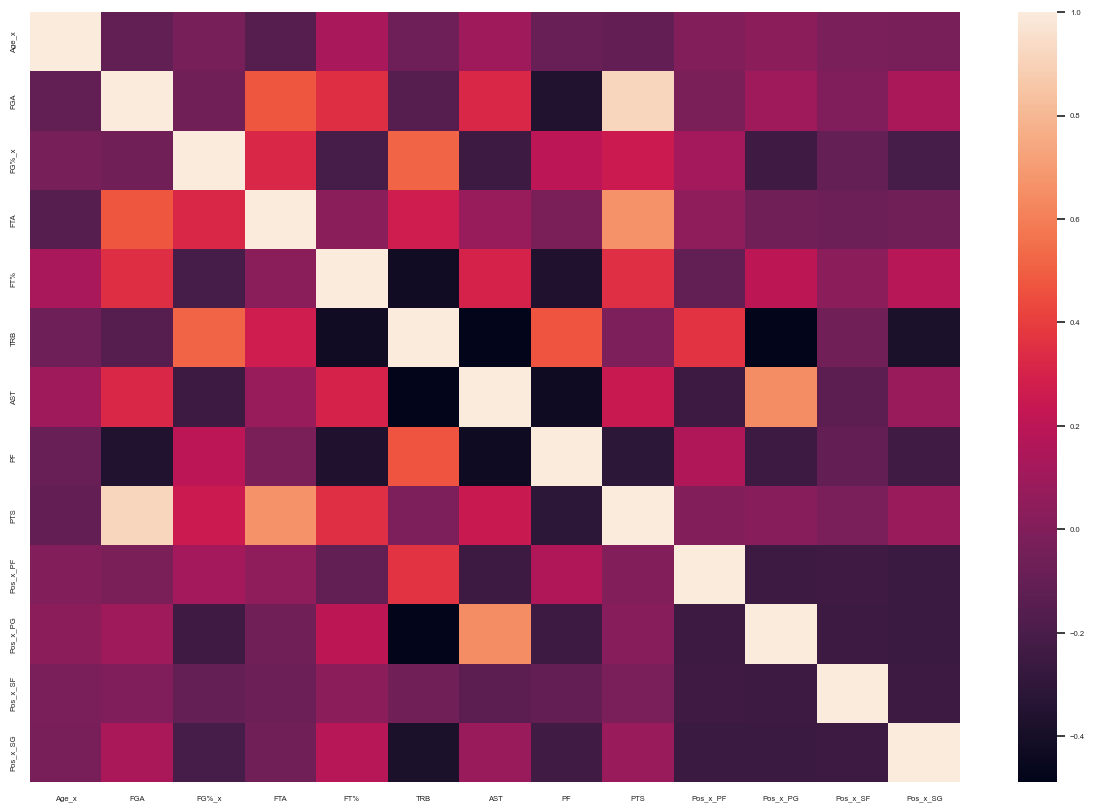

In [271]:
# derive correlation matrix 
corr_data = predictors.corr()
corr_data.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corr_data)
plt.show()

In [273]:
corr_data

,Age_x,FGA,FG%_x,FTA,FT%,TRB,AST,PF,PTS,Pos_x_PF,Pos_x_PG,Pos_x_SF,Pos_x_SG
Age_x,1.000000,-0.115435,-0.039199,-0.153603,0.130788,-0.064014,0.100985,-0.089021,-0.106936,0.002212,0.029225,-0.027091,-0.030786
FGA,-0.115435,1.000000,-0.061742,0.473604,0.347463,-0.152346,0.324748,-0.358940,0.915469,-0.019614,0.097638,-0.010476,0.138760
FG%_x,-0.039199,-0.061742,1.000000,0.319758,-0.215070,0.515707,-0.255314,0.200756,0.250902,0.117231,-0.243089,-0.100453,-0.212852
FTA,-0.153603,0.473604,0.319758,1.000000,0.023276,0.269108,0.080521,-0.022646,0.665074,0.050031,-0.060170,-0.078715,-0.061296
FT%,0.130788,0.347463,-0.215070,0.023276,1.000000,-0.418992,0.301931,-0.366083,0.349954,-0.112497,0.204747,0.031072,0.183167
TRB,-0.064014,-0.152346,0.515707,0.269108,-0.418992,1.000000,-0.488422,0.469917,-0.016489,0.361961,-0.487591,-0.053892,-0.379653
AST,0.100985,0.324748,-0.255314,0.080521,0.301931,-0.488422,1.000000,-0.432959,0.245389,-0.248311,0.645719,-0.130287,0.084418
PF,-0.089021,-0.358940,0.200756,-0.022646,-0.366083,0.469917,-0.432959,1.000000,-0.311204,0.157723,-0.244683,-0.108838,-0.235265
PTS,-0.106936,0.915469,0.250902,0.665074,0.349954,-0.016489,0.245389,-0.311204,1.000000,0.002193,0.021953,-0.027392,0.085299
Pos_x_PF,0.002212,-0.019614,0.117231,0.050031,-0.112497,0.361961,-0.248311,0.157723,0.002193,1.000000,-0.253575,-0.243500,-0.259432


In [275]:
def eliminateCorr(data, threshold):

    corrData = np.abs(data.corr())
    
    while ((corrData < 1) & (corrData > threshold)).any().any():
    
        bigCorr = 0
        maxCol = ''
        maxInd = ''

        # find the biggest piecewise correlation
        for col in corrData.columns:
            for idx in list(corrData.index):
                if (corrData.loc[idx, col] > bigCorr) & (corrData.loc[idx, col] != 1):
                    bigCorr = corrData.loc[idx, col]
                    maxCol = col
                    maxIdx = idx

        # drop the column with the highest piecewise correlation
        if (np.mean(corrData.loc[maxIdx, :]) > np.mean(corrData.loc[:, maxCol])):
            corrData.drop(maxIdx, axis = 0, inplace = True)
            corrData.drop(maxIdx, axis = 1, inplace = True)
        else:
            corrData.drop(maxCol, axis = 0, inplace = True)
            corrData.drop(maxCol, axis = 1, inplace = True)

    return data[corrData.columns]

In [277]:
predictorsReduced = eliminateCorr(predictors, 0.8)

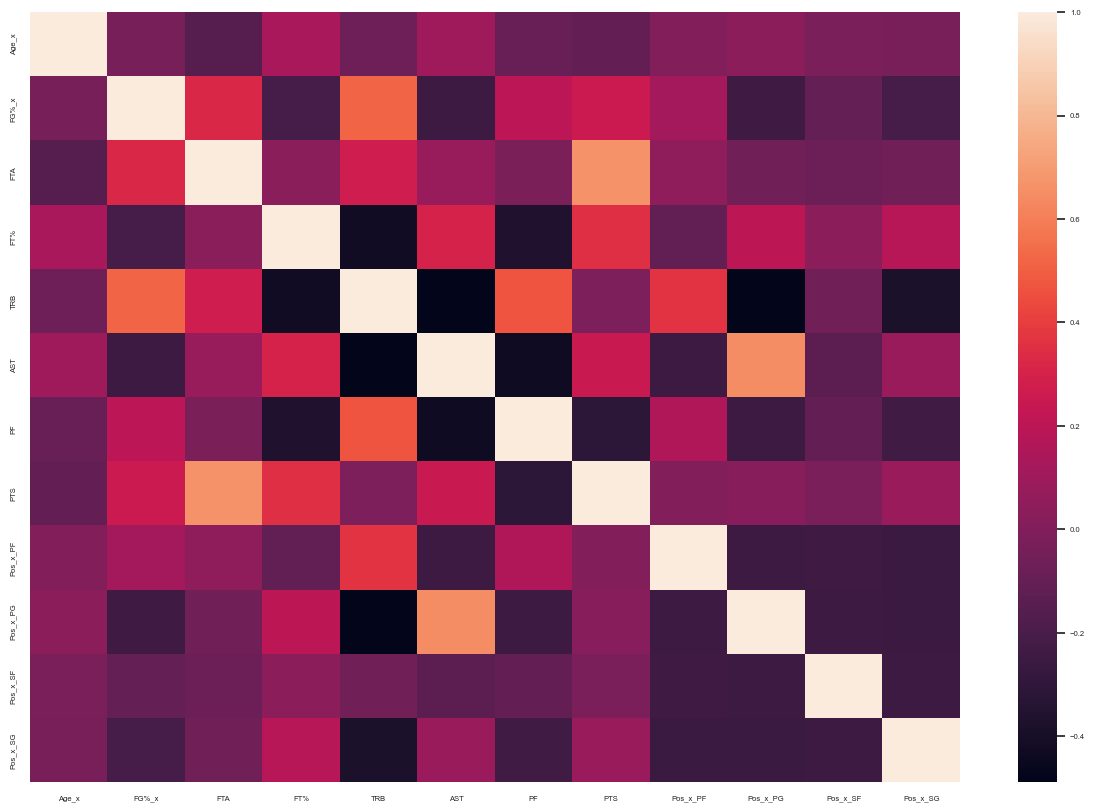

In [279]:
# derive correlation matrix 
corr_dataReduced = predictorsReduced.corr()
corr_dataReduced.dropna()

# visualize correlation matrix

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.heatmap(corr_dataReduced)
plt.show()

In [281]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

xTrainPercJump, xTestPercJump, yTrainPercJump, yTestPercJump = train_test_split(predictorsReduced, outcome.iloc[:, 0], test_size=0.2, random_state=42)
xTrainJumpPerc, xTestJumpPerc, yTrainJumpPerc, yTestJumpPerc = train_test_split(predictorsReduced, outcome.iloc[:, 1], test_size=0.2, random_state=42)

In [285]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression

In [287]:
# designate cvParam to use for all the models
cvParam = RepeatedKFold(n_splits = 10, n_repeats = 3)

In [289]:
# instantiate Linear Regression
lm = LinearRegression()

cvScoresLM = cross_val_score(lm, xTrainPercJump, yTrainPercJump, cv = cvParam, scoring = 'neg_mean_squared_error')

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 578, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1049, in check_array
    _assert_all_finite(
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
